# Introduction to Python Jupyter

Welcome to Jupyter, through this interface I will be showing you the following:

  - Python - A programming language that lets you work quickly. - [Documentation](https://docs.python.org/3/)
  - NLTK - Natural Languge Toolkit - a Python Library for working with written language data. -  [Documentation](http://www.nltk.org/book/)
  - Open Collections API - Our "Application Programming Interface" which will allow you to import full text. - [Documentation](https://open.library.ubc.ca/docs)
  
Python is a great language for data analysis, more experienced programmers might want to use R, but Python is a nice entry point for everyone.

**If you don't know Python, or any programming for that matter, please remain calm you won't need to do any programming** throughout this talk, however if you do know Python you can feel free to edit any of the code and have your notebook update accordingly.

## Getting the Full Text

To begin with we are just going to get one item from the Open Collections API and perform some analysis on that. Later on we will look at getting entire collections, and performing searches via the API. 

For our first item I have chosen:

https://open.library.ubc.ca/collections/bcbooks/items/1.0059569

The Open Collections API URL is: 

https://oc-index.library.ubc.ca 

So to access the item I have chosen via the API we would need to GET the data from:

https://oc-index.library.ubc.ca/collections/bcbooks/items/1.0059569

In [1]:
import json
import requests

apiResponse = requests.get('https://oc-index.library.ubc.ca/collections/bcbooks/items/1.0059569').json()
item = apiResponse['data']
fullText = item['FullText'][0]['value']
print(fullText)

EXPLORATION.—BRITISH NORTH AMERICA.
THE
JOURNALS, DETAILED REPORTS, AND OBSERVATIONS
RELATIVE TO
THE   EXPLORATION;
BY CAPTAIN PALLISER,
OP
THAT PORTION OF BRITISH NORTH AMERICA
WHICH,
IN LATITUDE, LIES BETWEEN THE BRITISH BOUNDARY LINE AND I
HEIGHT OF LAND OR WATERSHED OF THE NORTHERN
OR FROZEN OCEAN RESPECTIVELY,
AND
IN LONGITUDE, BETWEEN THE WESTERN SHORE OF LAKE SUPERIOR AND
THE PACIFIC OCEAN-
During the Years 1857, 1858, 1859, and 1860.
liJrrcentra to fcotf) %}ouzc<$ of Parliament tn> <rommaitD of Her iHajr sty,
19th May 1863.
LONDON:
PRINTED BY GEORGE EDWARD EYRE AND WILLIAM SPOTTISWOODE,
PRINTERS TO THE QUEEN'S MOST EXCELLENT MAJESTY.
FOR HER MAJESTY'S STATIONERY OFFICE.
4844.
1863.1858.
Aug. 3 to Oct. 7
5.
Dr. Hector's Journeys.
Slaughter Camp to Old Bow Fort, Bow River, Vermilion Pass,
Beaverfoot Pass, Kicking'-horse Pass, Little Fork Pass, North
Sakatchewan River to Fort Edmonton (Dr. Hector)
Short Excursions from Fort Edmonton.
Oct. 1858 to May 1859 To Beaver Lake (Oapt. Pal

## Cleaning Up The Full Text

In order for better results from our analysis later we need to clean up the full text. 

This could be a project within itself and will differ item to item so for the intial run I have just set the full text to get lowered so 'Canada' and 'canada' aren't considered two different words.

I've also provided a basic regex that you can uncomment to strip everything other than words from the full text

In [2]:
import re, string;

fullTextLower = fullText.lower()
cleanFullText = fullTextLower

### To strip everything other than words uncomment below ###
pattern = re.compile('[\W_]+')
cleanFullText = pattern.sub(' ', cleanFullText)

print(cleanFullText)

exploration british north america the journals detailed reports and observations relative to the exploration by captain palliser op that portion of british north america which in latitude lies between the british boundary line and i height of land or watershed of the northern or frozen ocean respectively and in longitude between the western shore of lake superior and the pacific ocean during the years 1857 1858 1859 and 1860 lijrrcentra to fcotf ouzc of parliament tn rommaitd of her ihajr sty 19th may 1863 london printed by george edward eyre and william spottiswoode printers to the queen s most excellent majesty for her majesty s stationery office 4844 1863 1858 aug 3 to oct 7 5 dr hector s journeys slaughter camp to old bow fort bow river vermilion pass beaverfoot pass kicking horse pass little fork pass north sakatchewan river to fort edmonton dr hector short excursions from fort edmonton oct 1858 to may 1859 to beaver lake oapt palliser to rocky mountain house capt palliser to snak

## Basic Analysis

So now we have the item's full text we are going to use the Natural Language Toolkit to perform some analysis on it using NLTK.

NLTK is a Python Library for working with written language data. It is free and very well documented. Many areas we'll be covering are treated in more detail in the NLTK Book, available for free online from [here](http://www.nltk.org/book/).

> Note: NLTK provides tools for tasks ranging from very simple (counting words in a text) to very complex (writing and training parsers, etc.). Many advanced tasks are beyond the scope of this talk, but by the time we're done, you should understand Python and NLTK well enough to perform these tasks on your own!

Firstly, we will need to import NLTK.

In [ ]:
import nltk # imports all the nltk basics
nltk.download("punkt") # Word tokenizer
nltk.download("stopwords") # Stop words
from nltk import word_tokenize

### Exploring Vocabulary

NLTK makes it really easy to get basic information about the size of a text and the complexity of its vocabulary.

*len* gives the number of symbols or 'tokens' in your text. This is the total number of words and items of punctuation.

*set* gives you a list of all the tokens in the text, without the duplicates.

Hence, **len(set(fullText))** will give you the total number unique tokens. Remember this still includes punctuation. 

sorted() places items in the list into alphabetical order, with punctuation symbols and capitalised words first.

#### Number of characters

In [4]:
len(fullText)

1872042

#### Number of unique characters

In [5]:
len(set(fullText))

111

#### List of unique characters

In [6]:
sorted(set(fullText))[:50] # Limited to 50

['\t',
 '\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P']

#### Get token count (words + symbols) 

*For our analysis, we want to break up the full text into words and punctuation, this step is called tokenization*

In [7]:
tokens = word_tokenize(cleanFullText)
len(tokens)

345014

#### Unique Token Count

In [8]:
len(set(tokens))

14892

#### Average number of times a word is used 

We can investigate the lexical richness of a text. For example, by dividing the total number of words by the number of unique words, we can see the average number of times each word is used.

In [9]:
len(tokens)/len(set(tokens))

23.167741069030352

#### Number of times a specific word is used

In [10]:
cleanFullText.count("vancouver")

40

#### Percentage of text that is a specific word

In [11]:
100.0*fullText.count("and")/len(fullText) 

0.5374345233707364

## Exploring Text

### Concordance

In [12]:
text = nltk.Text(tokens)
text.concordance("vancouver")

Displaying 25 of 39 matches:
al sketch map of the south east of vancouver island and part of the coast of th
eological sketch map of nanaimo in vancouver island with three sections to illu
er and dr hector 5 general section vancouver island to york factory hudson bay 
been to have proceeded westward to vancouver s island after crossing the mounta
brigade of boats had ascended from vancouver the mail from the western departme
and then descended the columbia to vancouver where they arrived generally about
return home vid columbia river and vancouver s island after leaving us on the 2
l craft in 53 days he reached fort vancouver a distance of 1 049 miles by the r
rican territory excepting those at vancouver s island to whom it is not necessa
us or cretaceous deposits known in vancouver s island occur along the coast of 
ct condition of the coal strata of vancouver s island the thicknesses of the fo
prevail as in the interior also on vancouver island they were observed near nan
rkings on t

### Words used similarly??

In [13]:
text.similar("miles")

feet days them which it hours inches and horses the yards us land that
men wood indians buffalo time edmonton


### Common contexts

Common contexts allow us to examine just the contexts that are shared by two or more words, such as valley and river.

In [14]:
text.common_contexts(["valley", "river"])

the_from the_to the_till large_and the_camp the_or the_until
columbia_the the_which the_here the_and the_august the_of the_before
columbia_i the_that the_has the_became the_through the_halt


### Longest words in the text

It is possible to select the longest words in a text, which may tell you something about its vocabulary and style

In [15]:
v = set(text)
long_words = [word for word in v if len(word) > 15]
sorted(long_words)

['androsomacfolium',
 'confertimannulatus',
 'flfcaammsmseasmgfwm',
 'hudsanhaystanford',
 'impracticability',
 'lentibulariaceos',
 'measurementcaptain',
 'misunderstanding',
 'monocotyledonous',
 'neckhandkerchief',
 'saskatcheioensis',
 'saskatchewanensis',
 'scrophulariacese',
 'subjolylicifolia',
 'unintermittingly',
 'wttfossiliferous']

### Collocations

We can also find words that typically occur together, which tend to be very specific to a text or genre of texts.

In [16]:
text.collocations()

rocky mountains; detailed reports; journals detailed; north america;
observations relative; red deer; british north; captain palliser; bay
company; red river; hudson bay; partially clear; boundary line; fort
pitt; bow river; deer river; 000 feet; half breeds; battle river;
jasper house


## Graphing Data

### Single Dispersion Plot

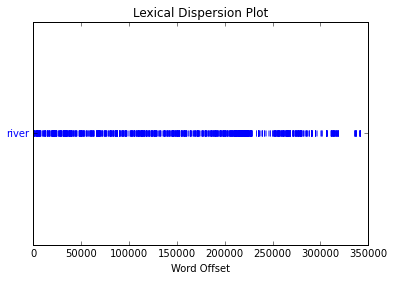

In [17]:
import numpy
# allow visuals to show up in this interface-
% matplotlib inline 
text.dispersion_plot(["river"])

### Multiple Dispersion Plot

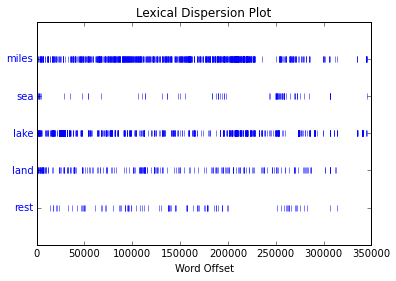

In [18]:
text.dispersion_plot(["miles", "sea", "lake", "land", "rest"])

### Frequency distributions

In [19]:
from nltk import FreqDist
fdist = FreqDist(text)
fdist.most_common(50)

[('the', 23841),
 ('of', 12408),
 ('and', 8710),
 ('to', 8064),
 ('a', 7316),
 ('in', 5214),
 ('we', 3327),
 ('at', 3025),
 ('which', 2671),
 ('is', 2518),
 ('m', 2494),
 ('on', 2446),
 ('with', 2314),
 ('from', 2314),
 ('river', 2286),
 ('that', 2183),
 ('33', 2174),
 ('i', 2136),
 ('by', 2064),
 ('as', 2041),
 ('for', 1977),
 ('0', 1922),
 ('it', 1814),
 ('this', 1768),
 ('was', 1631),
 ('s', 1578),
 ('9', 1503),
 ('had', 1502),
 ('5', 1400),
 ('are', 1390),
 ('27', 1352),
 ('very', 1328),
 ('p', 1326),
 ('were', 1316),
 ('2', 1296),
 ('but', 1256),
 ('our', 1227),
 ('jj', 1148),
 ('they', 1140),
 ('1', 1071),
 ('miles', 969),
 ('be', 956),
 ('mountains', 925),
 ('n', 924),
 ('99', 903),
 ('have', 903),
 ('not', 903),
 ('3', 895),
 ('valley', 894),
 ('4', 872)]

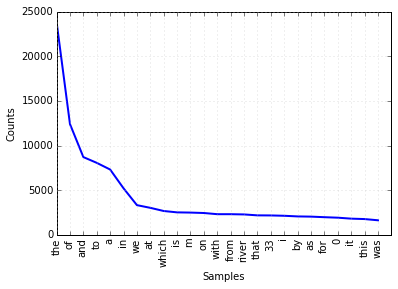

In [20]:
fdist.plot(25)